<a href="https://colab.research.google.com/github/Sargam-max/Machine_Learning/blob/main/logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

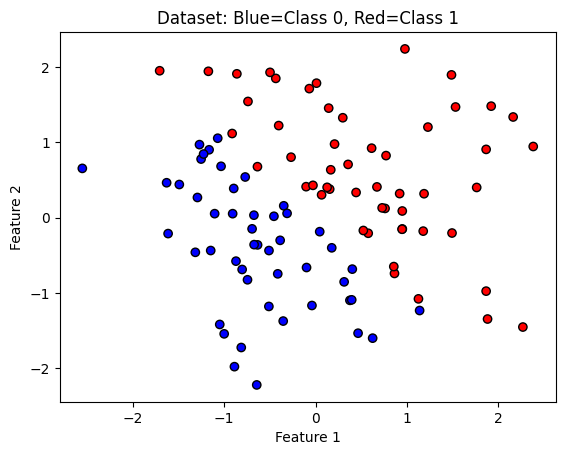

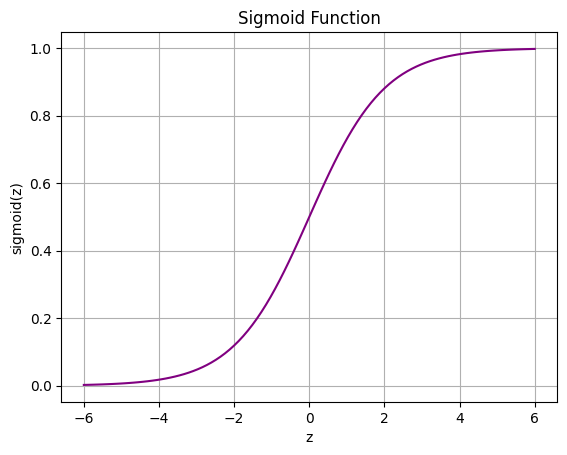

Epoch 0 | Cost: 0.6931
Epoch 100 | Cost: 0.2738
Epoch 200 | Cost: 0.2049
Epoch 300 | Cost: 0.1725
Epoch 400 | Cost: 0.1527
Epoch 500 | Cost: 0.1391
Epoch 600 | Cost: 0.1289
Epoch 700 | Cost: 0.1210
Epoch 800 | Cost: 0.1145
Epoch 900 | Cost: 0.1091


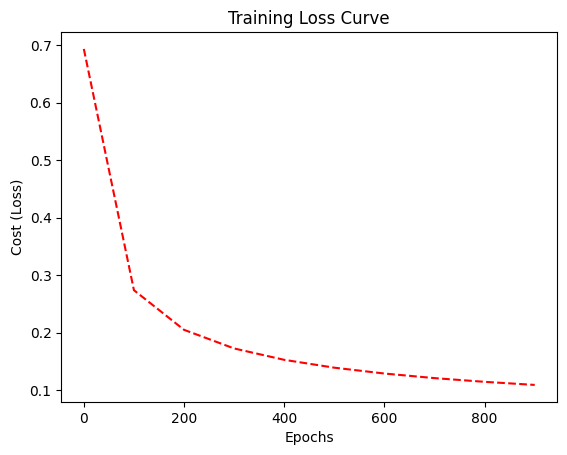

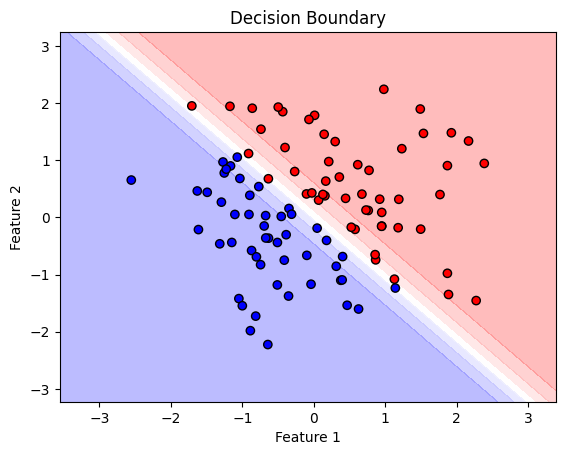

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Step 1️⃣ — Generate Example Data
# ------------------------------
np.random.seed(0)
# 100 samples, 2 features
X = np.random.randn(100, 2)
# True relationship: if x1 + x2 > 0 ⇒ class 1, else class 0
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Plot dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("Dataset: Blue=Class 0, Red=Class 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# ------------------------------
# Step 2️⃣ — Define Sigmoid Function
# ------------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# Visualize sigmoid function
z = np.linspace(-6, 6, 100)
plt.plot(z, sigmoid(z), color='purple')
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()


# ------------------------------
# Step 3️⃣ — Define Cost Function
# ------------------------------
def compute_cost(y, y_pred):
    m = len(y)
    cost = - (1 / m) * np.sum(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
    return cost


# ------------------------------
# Step 4️⃣ — Train using Gradient Descent
# ------------------------------
def train_logistic_regression(X, y, lr=0.1, epochs=1000):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    cost_history = []

    for epoch in range(epochs):
        z = np.dot(X, w) + b
        y_pred = sigmoid(z)

        # Gradients
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)

        # Update parameters
        w -= lr * dw
        b -= lr * db

        # Record cost
        if epoch % 100 == 0:
            cost = compute_cost(y, y_pred)
            cost_history.append(cost)
            print(f"Epoch {epoch} | Cost: {cost:.4f}")

    return w, b, cost_history


# Train model
w, b, cost_history = train_logistic_regression(X, y, lr=0.1, epochs=1000)

# ------------------------------
# Step 5️⃣ — Plot Cost Curve
# ------------------------------
plt.plot(range(0, 1000, 100), cost_history, 'r--')
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Cost (Loss)")
plt.show()


# ------------------------------
# Step 6️⃣ — Decision Boundary Visualization
# ------------------------------
def plot_decision_boundary(X, y, w, b):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = sigmoid(np.dot(grid, w) + b).reshape(xx.shape)

    plt.contourf(xx, yy, probs, cmap='bwr', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


plot_decision_boundary(X, y, w, b)
